In [22]:
import numpy as np
import astroalign as aa
%matplotlib inline
import matplotlib.pyplot as plt
# We pick a frame that is relatively well matched and doesn't have too many stars for testing
# target is extractions via sep, source is references star positions from Gaia DR2
# that have been converted to pixel via image WCS and have proper_motion corrections applied for
# the observing epoch.
target = np.load('target.npy')
source = np.load('source.npy')
print(aa.__version__)

2.3.1


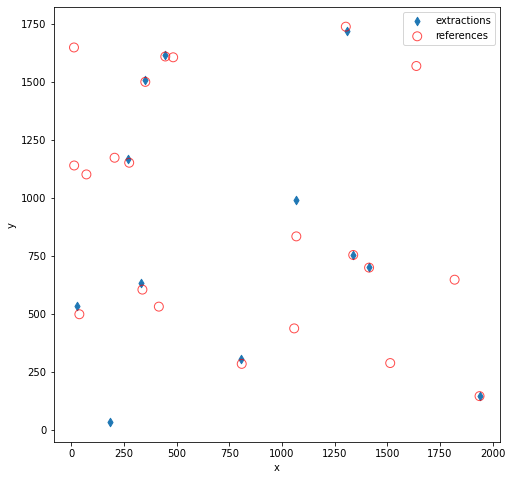

In [2]:
plt.figure(figsize=(8,8))
plt.scatter(target[:,0],target[:,1],marker='d',label='extractions')
plt.scatter(source[:,0],source[:,1],alpha=0.7,marker='o',s=80,
            label='references',facecolor='None',edgecolor='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

### Some info about the arrays.

In [3]:
print('lengths:',len(target),len(source),'shapes:',target.shape,source.shape)
for i,stara in enumerate(source):
    try:
        print(stara,target[i])
    except IndexError:
        print(stara)

lengths: 12 21 shapes: (12, 2) (21, 2)
[1938.37626961  144.78829716] [1939.61091278  145.97199619]
[1413.83088379  698.74346478] [1414.73856939  699.84376775]
[ 446.22102727 1608.89147852] [ 443.95616162 1613.83448891]
[ 38.17518941 497.67654027] [ 29.26206659 533.59769915]
[ 274.79396628 1150.91243213] [1307.73949466 1720.89731285]
[1303.37481756 1737.41251239] [ 269.44925722 1168.60692508]
[ 351.25880491 1499.46153497] [ 347.72363019 1508.79888574]
[1338.57357103  753.22720998] [1339.17433198  755.03709459]
[809.14769414 283.77526048] [1065.11922163  992.36672755]
[337.56582895 603.9644749 ] [804.13380434 306.39669807]
[  71.62501805 1100.55389796] [183.40065501  33.02123106]
[415.63476008 530.54158354] [330.62021711 630.8327855 ]
[1058.24268509  436.67670509]
[1819.99043652  646.63832159]
[1068.39684325  833.41737688]
[1514.16609617  287.30845015]
[  12.69682083 1647.82361376]
[ 483.60142586 1605.47633224]
[1638.26330787 1567.9524492 ]
[ 205.40087013 1172.44950913]
[  13.52065636 11

### Notice:

There are roughly 10 matching stars.

The arrays are already somewhat aligned by brightness, with the top 4 stars being confirmed matches.

Now I demonstrate the only ways it works (limit to pre-matched stars at the beginning of the array).

In [25]:
#Starting with what does not work:
fwhm = 5  #Based on FWHM of extracted stars
aa.PIXEL_TOL = 2*fwhm #Not sure what to set this at.
aa.find_transform(source,target)

MaxIterError: Max iterations exceeded while trying to find acceptable transformation.

In [26]:
#The only way it works
fwhm = 5  #Based on FWHM of extracted stars
aa.PIXEL_TOL = 2*fwhm #Not sure what to set this at.
aa.find_transform(source,target,max_control_points=3) #This works

(<SimilarityTransform(matrix=
     [[ 1.00259326e+00,  1.62536220e-04, -3.45715394e+00],
      [-1.62536220e-04,  1.00259326e+00,  4.94873298e-01],
      [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]]) at 0x1a21a47490>,
 (array([[1938.37626961,  144.78829716],
         [1413.83088379,  698.74346478],
         [ 446.22102727, 1608.89147852]]),
  array([[1939.61091278,  145.97199619],
         [1414.73856939,  699.84376775],
         [ 443.95616162, 1613.83448891]])))

In [5]:
aa.find_transform(source,target,max_control_points=4) #This Fails

MaxIterError: Max iterations exceeded while trying to find acceptable transformation.

In [6]:
aa.find_transform(source[1:],target[1:],max_control_points=3) #This Works

(<SimilarityTransform(matrix=
     [[ 9.96345286e-01,  1.38728953e-02, -1.40835396e+01],
      [-1.38728953e-02,  9.96345286e-01,  2.61836627e+01],
      [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]]) at 0x1a21990ad0>,
 (array([[1413.83088379,  698.74346478],
         [ 446.22102727, 1608.89147852],
         [  38.17518941,  497.67654027]]),
  array([[1414.73856939,  699.84376775],
         [ 443.95616162, 1613.83448891],
         [  29.26206659,  533.59769915]])))

In [7]:
aa.find_transform(source,target[1:],max_control_points=3) #This Fails

MaxIterError: Max iterations exceeded while trying to find acceptable transformation.

In [8]:
aa.find_transform(source[1:],target,max_control_points=3) #This Fails

MaxIterError: Max iterations exceeded while trying to find acceptable transformation.

In [9]:
for pix in [2,5,10]:
    aa.PIXEL_TOL = pix
    for nn in [5,10,15,21]:
        aa.NUM_NEAREST_NEIGHBORS = nn
        for maxn in [3,4,5,21]:
            try:
                aa.find_transform(source,target,max_control_points=maxn)
                print('We succeeded, NUM_NEAREST_NEIGHBORS = {}, max_control_points={}, PIXEL_TOL={}'.format(nn,maxn,pix))
            except aa.MaxIterError:
                print('We failed NUM_NEAREST_NEIGHBORS = {}, max_control_points={}, PIXEL_TOL={}'.format(nn,maxn,pix))
    print('')

We succeeded, NUM_NEAREST_NEIGHBORS = 5, max_control_points=3, PIXEL_TOL=2
We failed NUM_NEAREST_NEIGHBORS = 5, max_control_points=4, PIXEL_TOL=2
We failed NUM_NEAREST_NEIGHBORS = 5, max_control_points=5, PIXEL_TOL=2
We failed NUM_NEAREST_NEIGHBORS = 5, max_control_points=21, PIXEL_TOL=2
We succeeded, NUM_NEAREST_NEIGHBORS = 10, max_control_points=3, PIXEL_TOL=2
We failed NUM_NEAREST_NEIGHBORS = 10, max_control_points=4, PIXEL_TOL=2
We failed NUM_NEAREST_NEIGHBORS = 10, max_control_points=5, PIXEL_TOL=2
We failed NUM_NEAREST_NEIGHBORS = 10, max_control_points=21, PIXEL_TOL=2
We succeeded, NUM_NEAREST_NEIGHBORS = 15, max_control_points=3, PIXEL_TOL=2
We failed NUM_NEAREST_NEIGHBORS = 15, max_control_points=4, PIXEL_TOL=2
We failed NUM_NEAREST_NEIGHBORS = 15, max_control_points=5, PIXEL_TOL=2
We failed NUM_NEAREST_NEIGHBORS = 15, max_control_points=21, PIXEL_TOL=2
We succeeded, NUM_NEAREST_NEIGHBORS = 21, max_control_points=3, PIXEL_TOL=2
We failed NUM_NEAREST_NEIGHBORS = 21, max_control

### Conclusions:

I would think this would be relatively easy given that by eye, there are nearly 10 matches, 5 of them being very good, within 1 FWHM. However, the successes and failures seem rather arbitrary to me.  

At higher pixel tolerance, match ratio increases and the MaxIterErrors decrease. However, it is still tightly depending on max_control_points. Working at low and high max_control_points but not in between. This is possibly a hack/coincidence of these two arrays being pre-matched. But, I have tried on many other frames (and star lists) and found the same inconsistency. And most of the time, even setting max_control_points over the total number of stars didn't work, and sometimes also setting it to 3 didn't work either. 

Another issue seems to be how tightly bound the match is to the star order in BOTH lists. Removing 1 star from a list leads to not a match, while removing 1 star from each list leads to a match again. I know that shuffling the list or star lists that are less well matched from the outset basically always lead to this MaxIterError for me.

For this notebook, I chose a frame that works relatively well and should be easy, but still fails in multiple ways, to hopefully troubleshoot the issue.

However, I did learn that increasing NUM_NEAREST_NEIGHBORS amd PIXEL_TOL significantly is giving more successes than I realized was possible. It's just that the resource utilization increases significantly for frames with many more stars. And we still randomly fail at max_control_points > 3 but less than the whole (is this just due to the array being "pre-matched"?). Perhaps a test with another frame is needed to demonstrate.

In [20]:
#Proof that order matters.
aa.PIXEL_TOL = 4*fwhm
aa.NUM_NEAREST_NEIGHBORS = 5
print(aa.find_transform(source,target,max_control_points=3))

np.random.shuffle(source)

print(aa.find_transform(source,target,max_control_points=3))

(<SimilarityTransform(matrix=
    [[ 1.00259326e+00,  1.62536220e-04, -3.45715394e+00],
     [-1.62536220e-04,  1.00259326e+00,  4.94873298e-01],
     [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]]) at 0x1a21a50290>, (array([[1938.37626961,  144.78829716],
       [1413.83088379,  698.74346478],
       [ 446.22102727, 1608.89147852]]), array([[1939.61091278,  145.97199619],
       [1414.73856939,  699.84376775],
       [ 443.95616162, 1613.83448891]])))


MaxIterError: Max iterations exceeded while trying to find acceptable transformation.

In [21]:
print(aa.find_transform(source,target,max_control_points=21))

MaxIterError: Max iterations exceeded while trying to find acceptable transformation.